## Notebook pour le nettoyage et le prétraitement des données

## Importation des bibliothèques

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Prétraitement des données

In [80]:
# Set up paths
EXPORTS_BY_PRODUCT = r"../data/interim/exports_by_product.csv"

# Load data
exports_by_product = pd.read_csv(EXPORTS_BY_PRODUCT)


In [81]:
# Check for missing values
exports_by_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      98 non-null     object 
 1   value_2003   98 non-null     int64  
 2   value_2004   98 non-null     int64  
 3   value_2005   98 non-null     int64  
 4   value_2006   98 non-null     int64  
 5   value_2007   98 non-null     int64  
 6   value_2008   98 non-null     int64  
 7   value_2009   98 non-null     int64  
 8   value_2010   98 non-null     int64  
 9   value_2011   98 non-null     int64  
 10  value_2012   98 non-null     int64  
 11  value_2013   98 non-null     int64  
 12  value_2014   98 non-null     int64  
 13  value_2015   98 non-null     int64  
 14  value_2016   98 non-null     int64  
 15  value_2017   98 non-null     int64  
 16  value_2018   98 non-null     int64  
 17  value_2019   98 non-null     int64  
 18  value_2020   98 non-null     int64  
 19  value_2021

In [82]:
# Create a time series for each product, frequency = 1 year

exports_by_product = exports_by_product.iloc[1:] # Skip the first row

products = exports_by_product['product'].unique() # Get the list of products
years = np.arange(2003, 2023) # Get the list of years

# A time series is a dataframe with columns: product, year, value, share
time_series = pd.DataFrame()
for product in products:
    for year in years:
        value = exports_by_product.loc[exports_by_product['product'] == product, f'value_{year}'].values[0]
        share = exports_by_product.loc[exports_by_product['product'] == product, f'share_{year}'].values[0]
        data = pd.DataFrame({'product': [product], 'year': [year], 'value': [value], 'share': [share]})
        time_series = pd.concat([time_series, data])

time_series = time_series.reset_index(drop=True)
time_series

,product,year,value,share
0,Fertilisers,2003,371608,4.25
1,Fertilisers,2004,431325,4.37
2,Fertilisers,2005,444344,3.97
3,Fertilisers,2006,533674,4.19
4,Fertilisers,2007,876747,5.72
...,...,...,...,...
1935,Commodities not elsewhere specified,2018,0,0.00
1936,Commodities not elsewhere specified,2019,0,0.00
1937,Commodities not elsewhere specified,2020,0,0.00
1938,Commodities not elsewhere specified,2021,0,0.00


In [83]:
# Convert Data Types
time_series['year'] = time_series['year'].astype(int)
time_series['value'] = time_series['value'].astype(float)
time_series['share'] = time_series['share'].astype(float)

In [84]:
# Standardize the data
scaler = StandardScaler()
time_series[['value', 'share']] = scaler.fit_transform(time_series[['value', 'share']])

In [85]:
# Check for NaN values
time_series.isna().sum()

product    0
year       0
value      0
share      0
dtype: int64

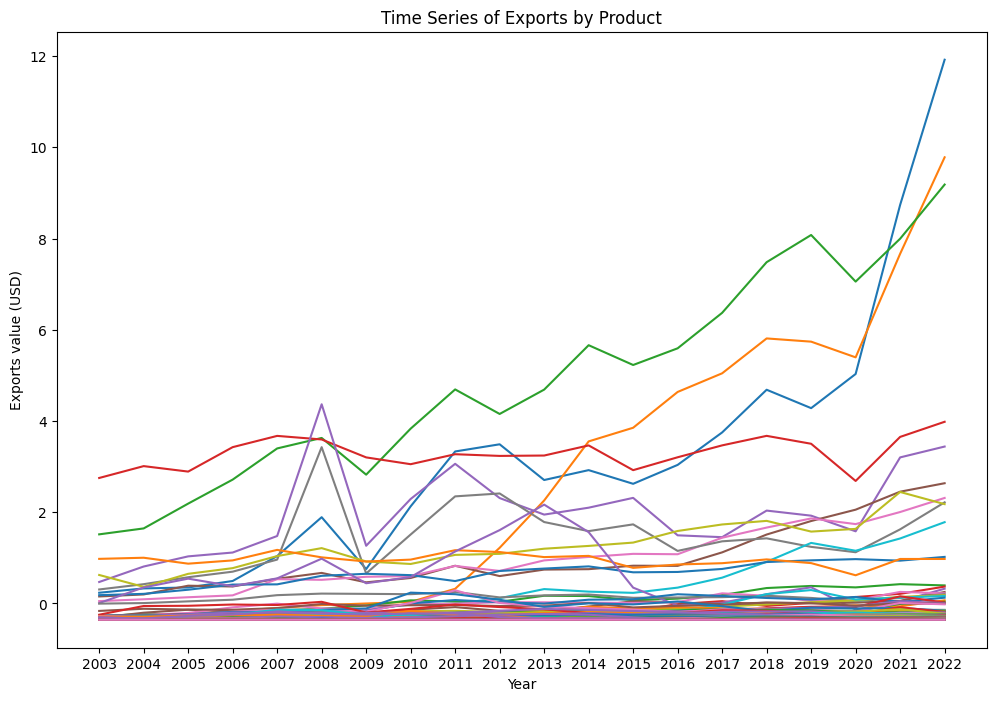

In [86]:
# for each product, plot the time series of exports

# set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# plot the time series of exports for each product, frequency = 1 year
for product in time_series['product'].unique():
    product_time_series = time_series[time_series['product'] == product]
    ax.plot(product_time_series['year'], product_time_series['value'], label=product)

# ensure the x-axis only shows integer years and all years are shown
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(np.arange(2003, 2023, 1))

# set up the labels
ax.set_xlabel('Year')
ax.set_ylabel('Exports value (USD)')
ax.set_title('Time Series of Exports by Product')

# show the plot
plt.show()

In [87]:
# Save the data
time_series.to_csv(r"../data/processed/exports_by_product_time_series.csv", index=False)